## Латиков Александр, задача 12

Задача - необходимо решить диффур:

du/dt + c * du/dx = 0

0<x<1 и 0<t<1

(a) u(t = 0) = 1; u(x = 0) = 1 + t

(б) u(t = 0) = 1 - abs(1 - 2x); u(x = 0) = t

Используются 4 метода: Куранта-Изаксона-Риса, Мак-Кормака, гибридная схема Федоренко, TVD

In [3]:
import numpy as np              
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [49]:
h = 0.002
t = 0.001
Nt = 1000
Nx = 500
c = 1.0

In [11]:
def pr_solve(A, f):
    n = f.size
    y = np.zeros(n, dtype = float)
    a = np.zeros(n, dtype = float)
    b = np.zeros(n, dtype = float)
    
    a[0] = A[0][0]
    b[0] = f[0]
    for i in range(1, n):
        a[i] = A[i][i] - A[i][i - 1] / a[i - 1] * A[i - 1][i]
        b[i] = f[i] - A[i][i - 1] / a[i - 1] * b[i - 1]
        
    y[n - 1] = b[n - 1] / a[n - 1]
    for i in range(1, n):
        j = n - 1 - i
        y[j] = (b[j] - A[j][j + 1] * y[j + 1]) / a[j]
        
    return y

In [12]:
A = np.array([[1.0, 1.0, 0], [1.0, 2.0, 1.0], [0, 1.0, 2.0]])
f = np.array([2.0, 4.0, 3.0])

y = pr_solve(A, f)
print(y)

[1. 1. 1.]


## (а) u(x, t = 0) = 1; u(x = 0, t) = 1 + t; u(x = 1, t) = 1

In [33]:
def ut0(x):
    return 1.0

def ux(t):
    return 1.0 + t

def ux_end(t):
    return 1.0

## Метод Куранта-Изаксона-Риса

In [50]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    for j in range(1, Nx):
        data[i][j] = data[i - 1][j] - t * c * (data[i - 1][j] - data[i - 1][j - 1]) / h

<IPython.core.display.Javascript object>


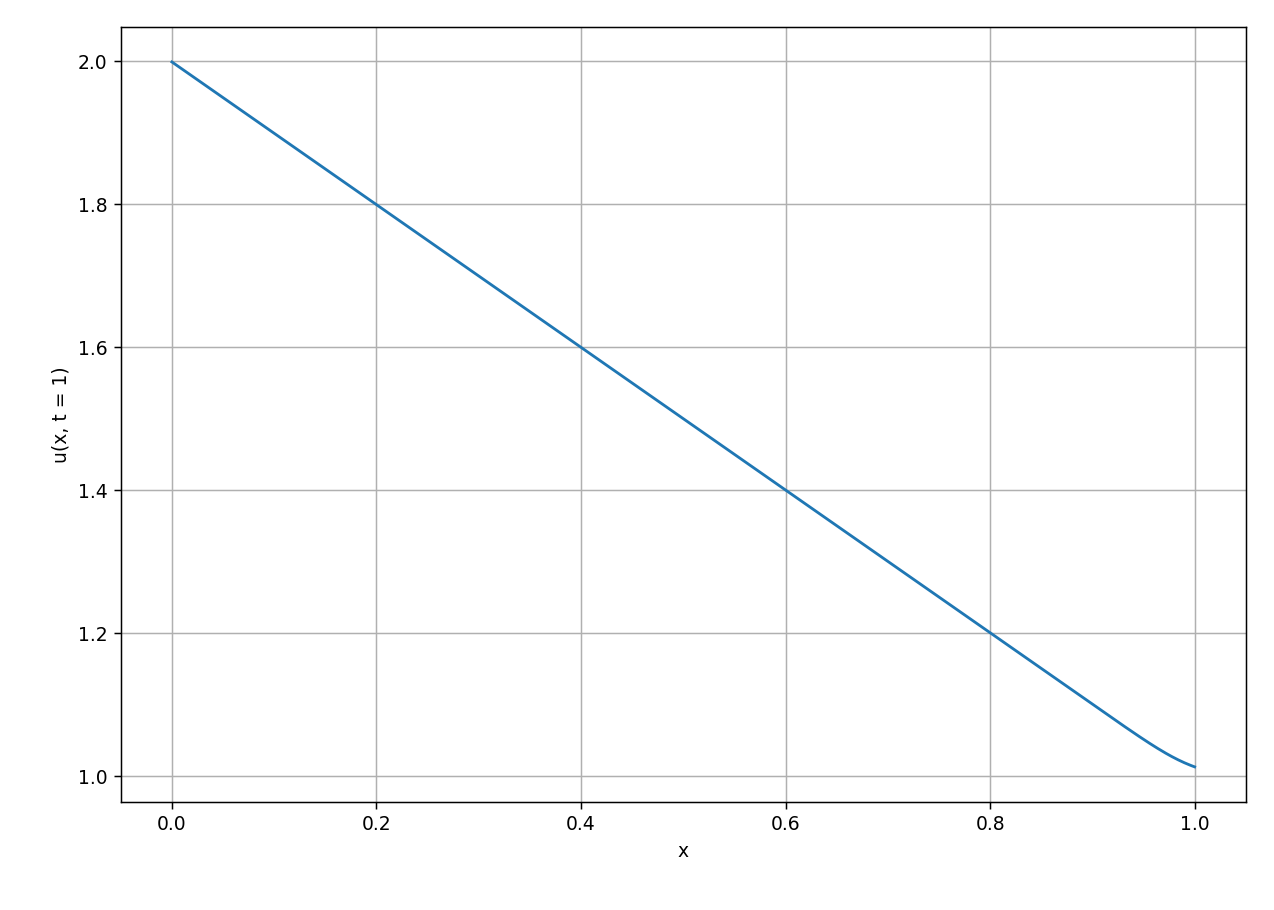

In [51]:
plt.figure(figsize = [7, 5])
plt.plot(X, data[Nt - 1])
plt.xlabel("x")
plt.ylabel("u(x, t = 1)")
plt.tight_layout() 
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


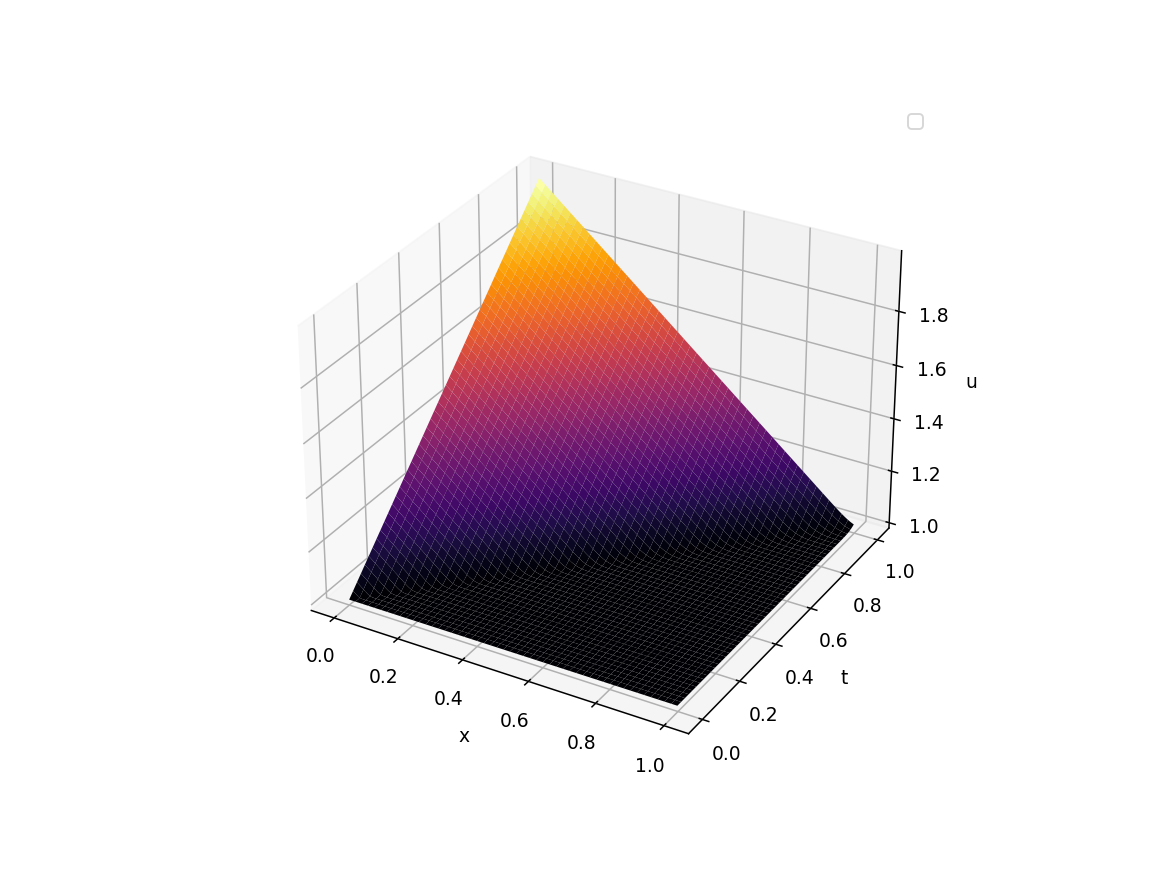

No handles with labels found to put in legend.


In [52]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Метод Мак-Кормака

In [53]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    u_pred0 = data[i - 1][1] - t * c * (data[i - 1][1] - data[i - 1][0]) / h
    for j in range(1, Nx - 1):
        u_pred1 = data[i - 1][j + 1] - t * c * (data[i - 1][j + 1] - data[i - 1][j]) / h
        data[i][j] = (data[i - 1][j] + u_pred0) / 2.0 - t * c * (u_pred1 - u_pred0) / 2.0 / h
        u_pred0 = u_pred1
    data[i][Nx - 1] = ux_end(t * i)
    

<IPython.core.display.Javascript object>


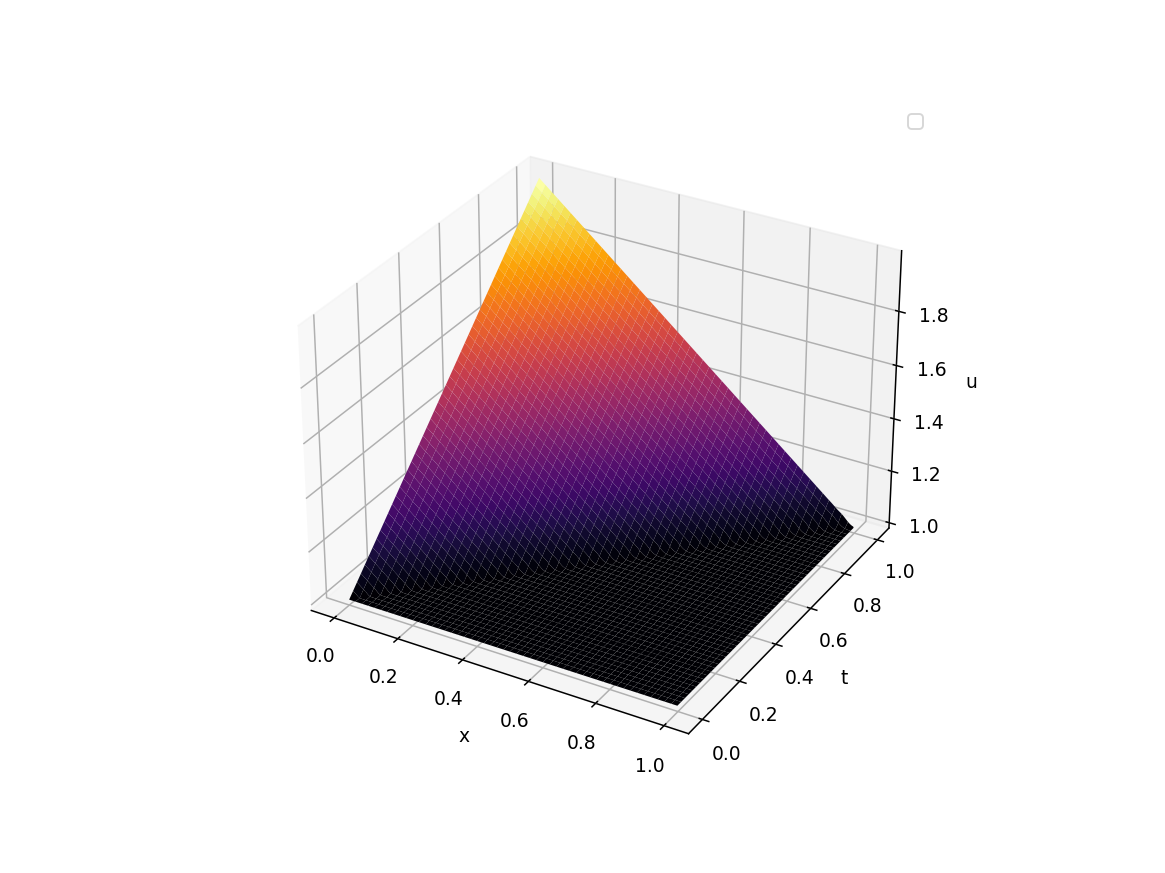

No handles with labels found to put in legend.


In [54]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Гибридная схема Федоренко

In [55]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    for j in range(1, Nx - 1):
        data[i][j] = data[i - 1][j] - t * c * (data[i - 1][j] - data[i - 1][j - 1]) / h - (t / h - (t / h) ** 2) / 2 * (data[i - 1][j - 1] - 2 * data[i - 1][j] + data[i - 1][j + 1])
    data[i][Nx - 1] = ux_end(t * i)

<IPython.core.display.Javascript object>


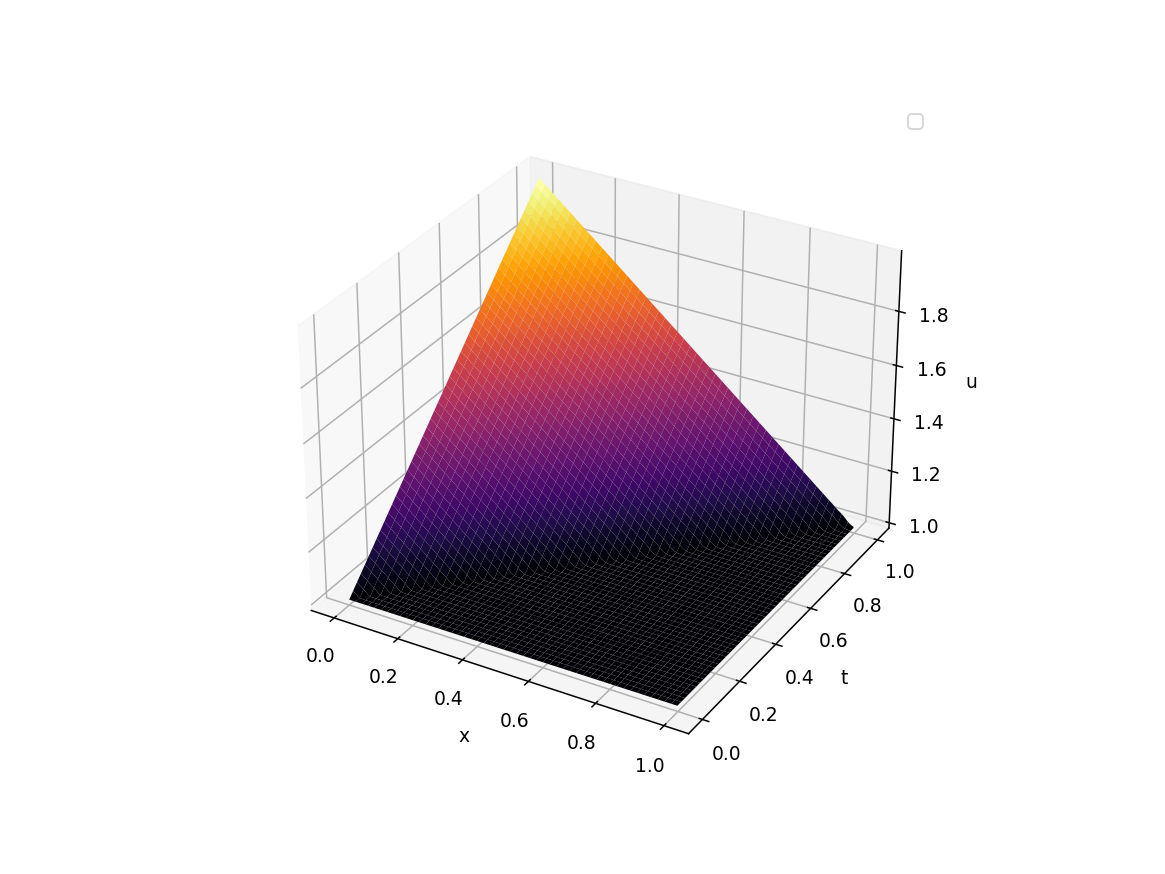

No handles with labels found to put in legend.


In [56]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Схема TVD

In [59]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    f0 = c * (data[i - 1][0] + (1 - c * t / h) / 2 * (data[i - 1][1] - data[i - 1][0]))
    for j in range(1, Nx - 1):
        f1 = c * (data[i - 1][j] + (1 - c * t / h) / 2 * (data[i - 1][j + 1] - data[i - 1][j]))
        data[i][j] = data[i - 1][j] - t / h * (f1 - f0)
        f0 = f1
    data[i][Nx - 1] = ux_end(t * i)

<IPython.core.display.Javascript object>


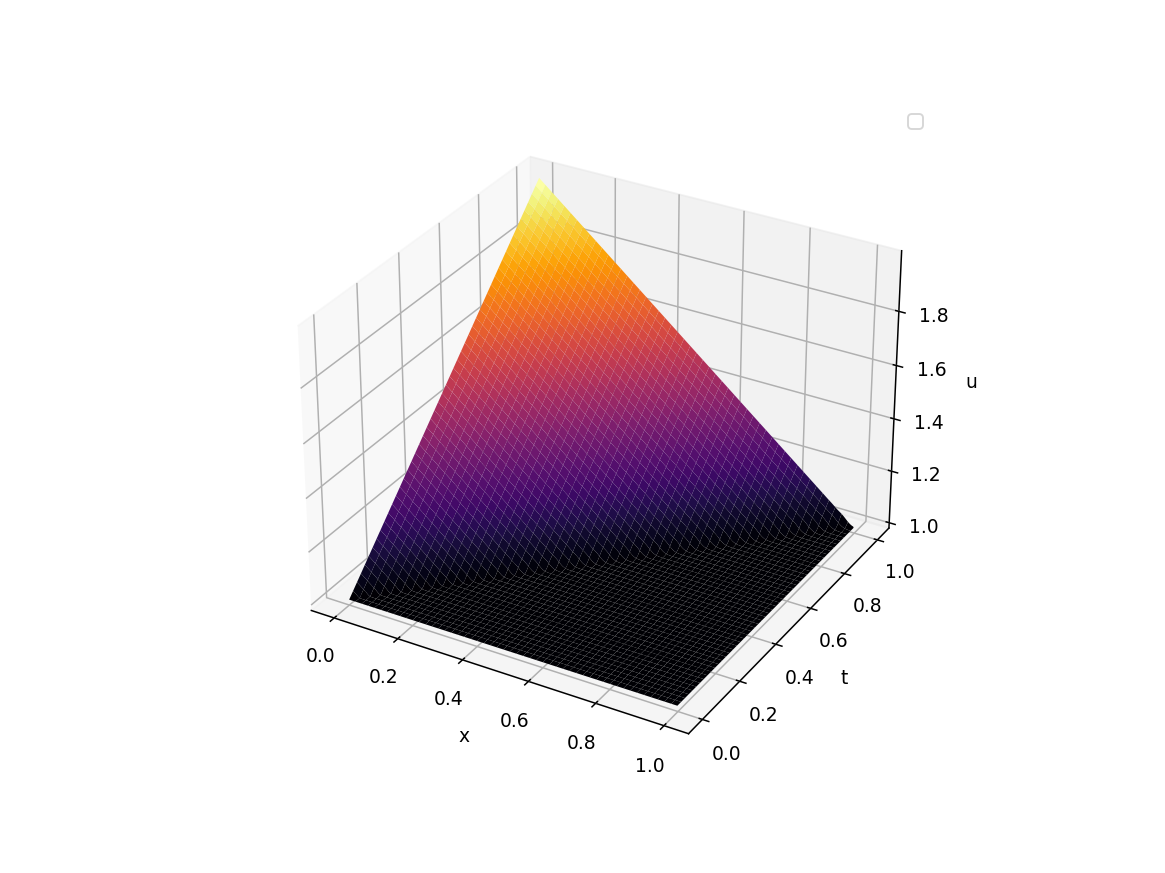

No handles with labels found to put in legend.


In [60]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## (б) u(x, t = 0) = 1 - abs(1 - 2x); u(x = 0, t) = t; u(x = 1, t) = 

In [70]:
def ut0(x):
    return 1.0 - abs(1.0 - 2.0 * x)

def ux(t):
    return t

def ux_end(t):
    return 1.0 - abs(1.0 - 2.0 * t)

## Метод Куранта-Изаксона-Риса

In [71]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    for j in range(1, Nx):
        data[i][j] = data[i - 1][j] - t * c * (data[i - 1][j] - data[i - 1][j - 1]) / h

<IPython.core.display.Javascript object>


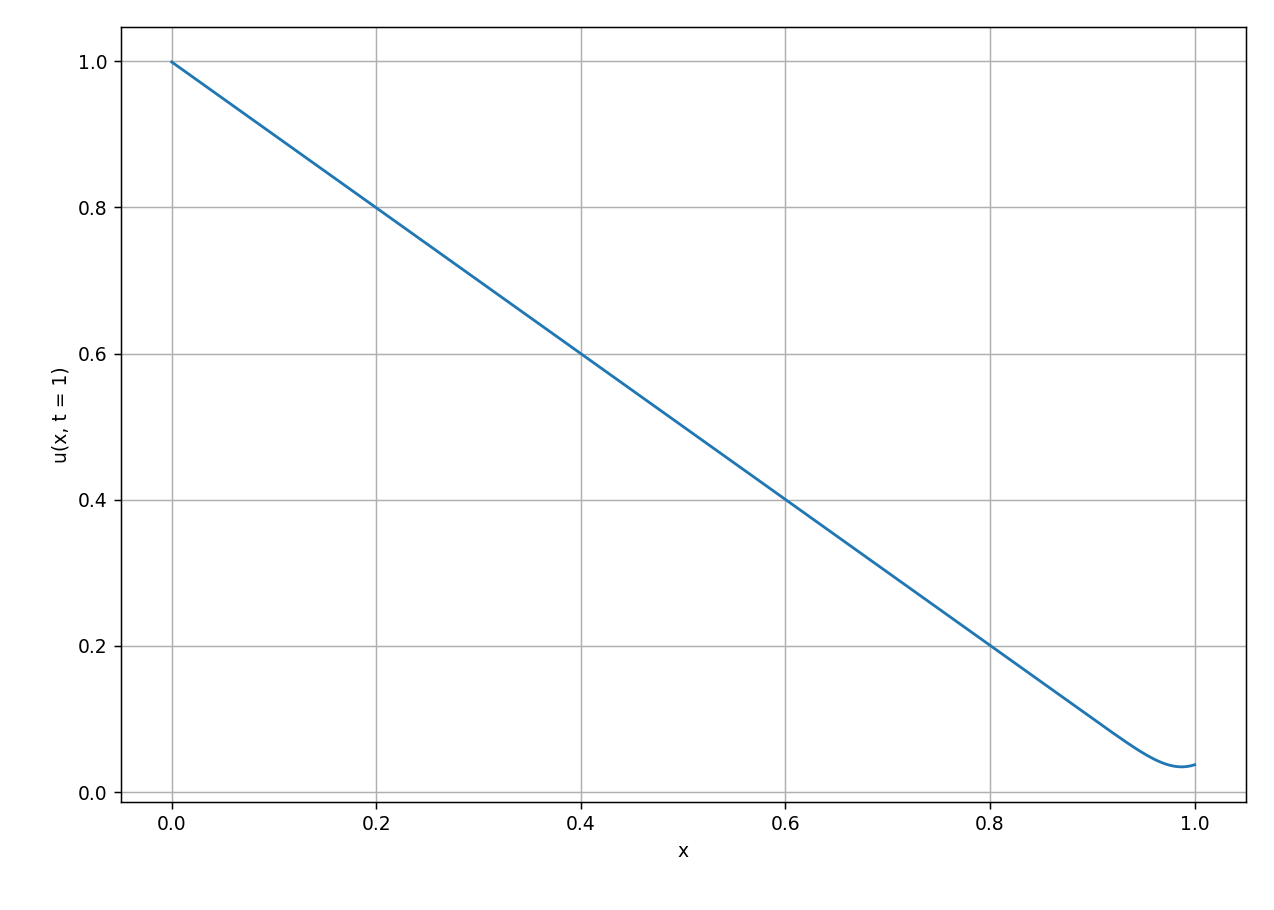

In [72]:
plt.figure(figsize = [7, 5])
plt.plot(X, data[Nt - 1])
plt.xlabel("x")
plt.ylabel("u(x, t = 1)")
plt.tight_layout() 
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


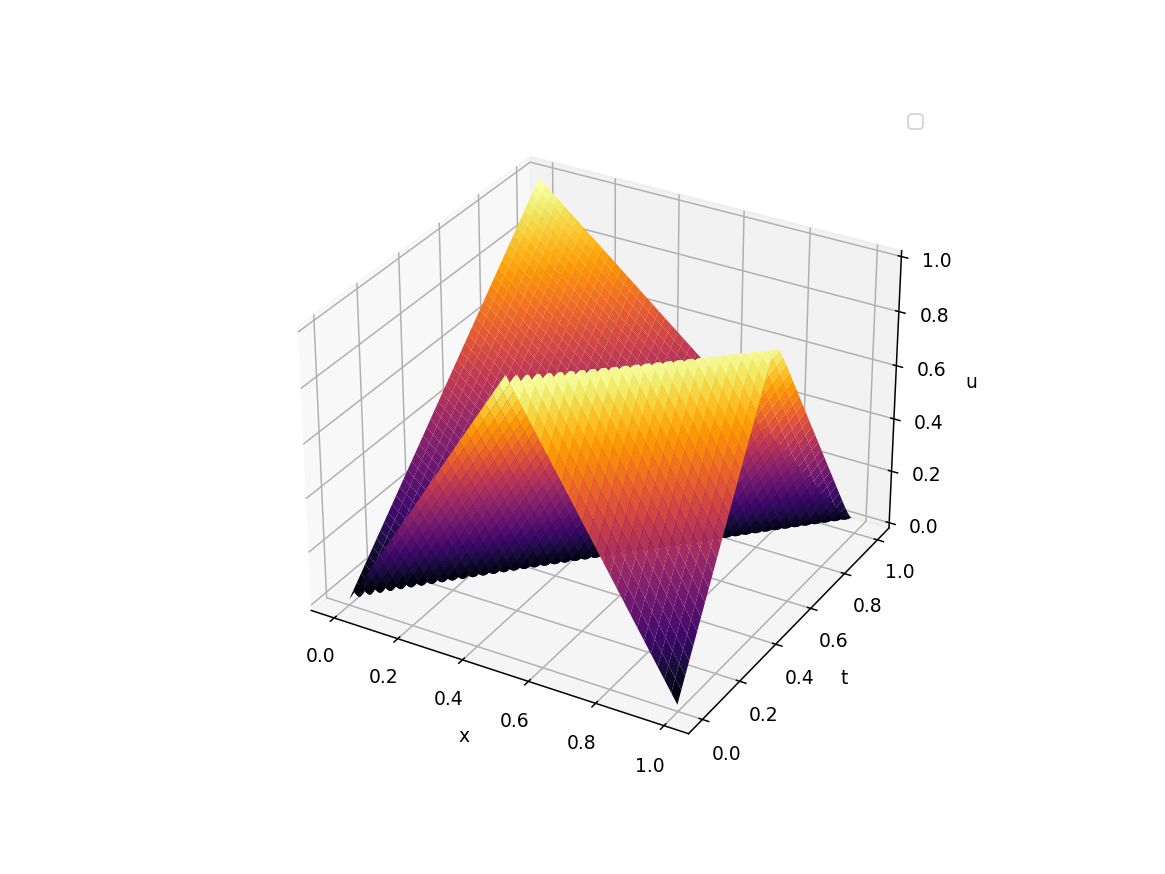

No handles with labels found to put in legend.


In [73]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Метод Мак-Кормака

In [74]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    u_pred0 = data[i - 1][1] - t * c * (data[i - 1][1] - data[i - 1][0]) / h
    for j in range(1, Nx - 1):
        u_pred1 = data[i - 1][j + 1] - t * c * (data[i - 1][j + 1] - data[i - 1][j]) / h
        data[i][j] = (data[i - 1][j] + u_pred0) / 2.0 - t * c * (u_pred1 - u_pred0) / 2.0 / h
        u_pred0 = u_pred1
    data[i][Nx - 1] = ux_end(t * i)
    

<IPython.core.display.Javascript object>


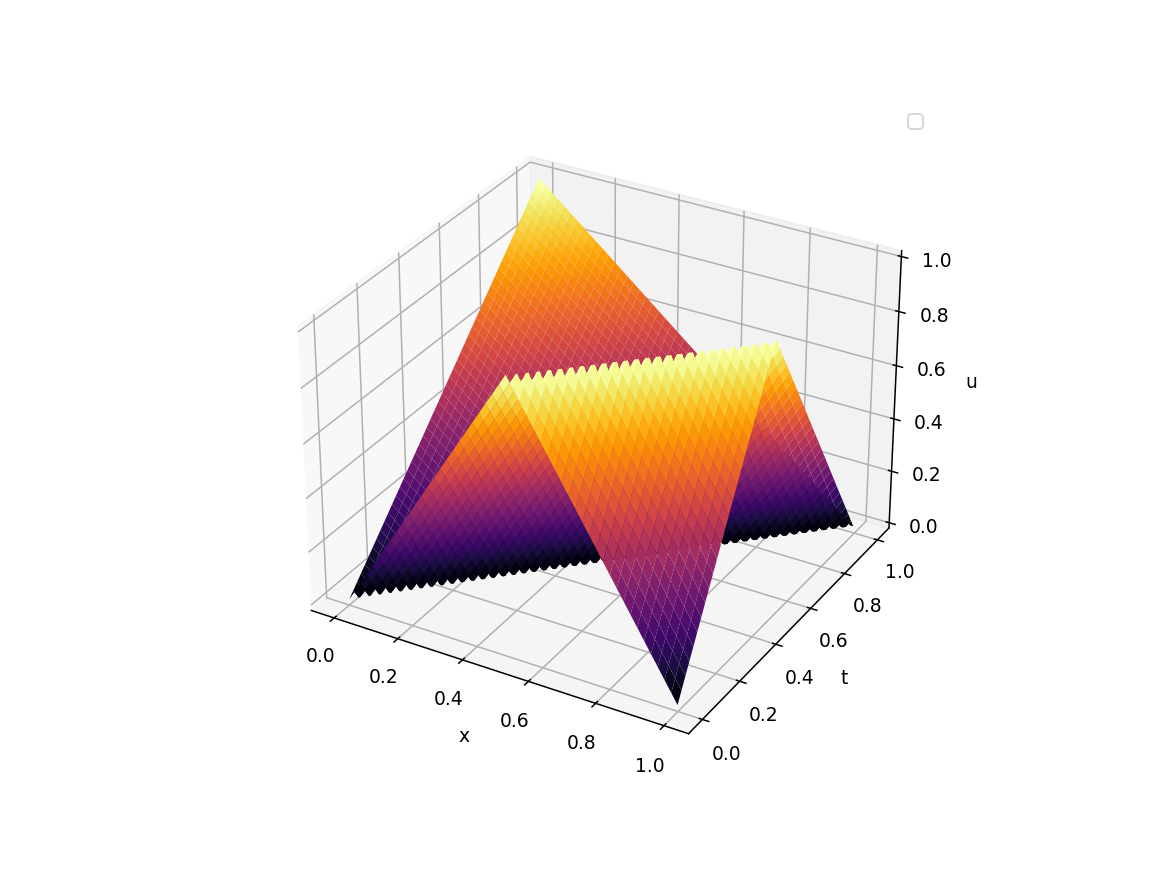

No handles with labels found to put in legend.


In [75]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Гибридная схема Федоренко

In [76]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    for j in range(1, Nx - 1):
        data[i][j] = data[i - 1][j] - t * c * (data[i - 1][j] - data[i - 1][j - 1]) / h - (t / h - (t / h) ** 2) / 2 * (data[i - 1][j - 1] - 2 * data[i - 1][j] + data[i - 1][j + 1])
    data[i][Nx - 1] = ux_end(t * i)

<IPython.core.display.Javascript object>


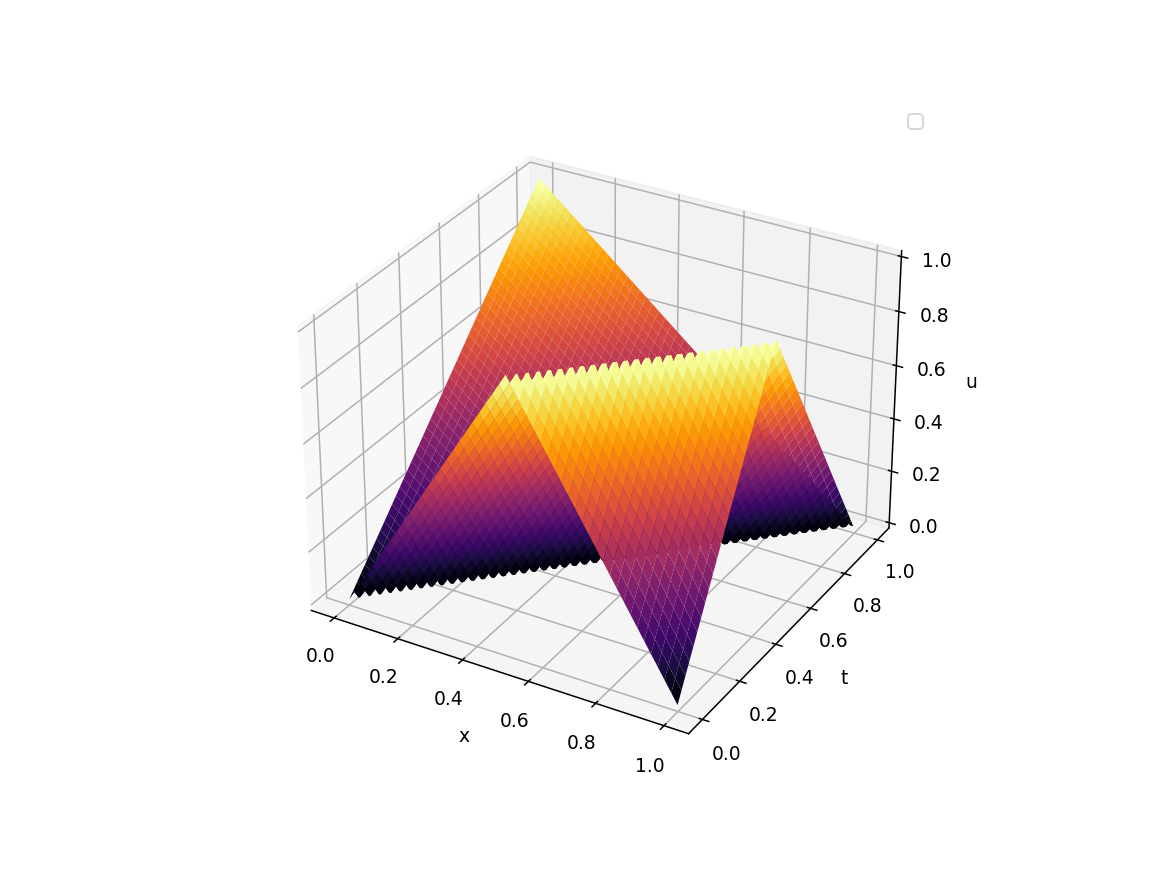

No handles with labels found to put in legend.


In [77]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()

## Схема TVD

In [78]:
data = np.zeros(Nt * Nx, dtype = float).reshape(Nt, Nx)
X = np.linspace(0.0, 1.0, Nx)
T = np.linspace(0.0, 1.0, Nt)
for i in range(Nx):
    data[0][i] = ut0(h * i)
    
for i in range(1, Nt):
    data[i][0] = ux(t * i)
    f0 = c * (data[i - 1][0] + (1 - c * t / h) / 2 * (data[i - 1][1] - data[i - 1][0]))
    for j in range(1, Nx - 1):
        f1 = c * (data[i - 1][j] + (1 - c * t / h) / 2 * (data[i - 1][j + 1] - data[i - 1][j]))
        data[i][j] = data[i - 1][j] - t / h * (f1 - f0)
        f0 = f1
    data[i][Nx - 1] = ux_end(t * i)

<IPython.core.display.Javascript object>


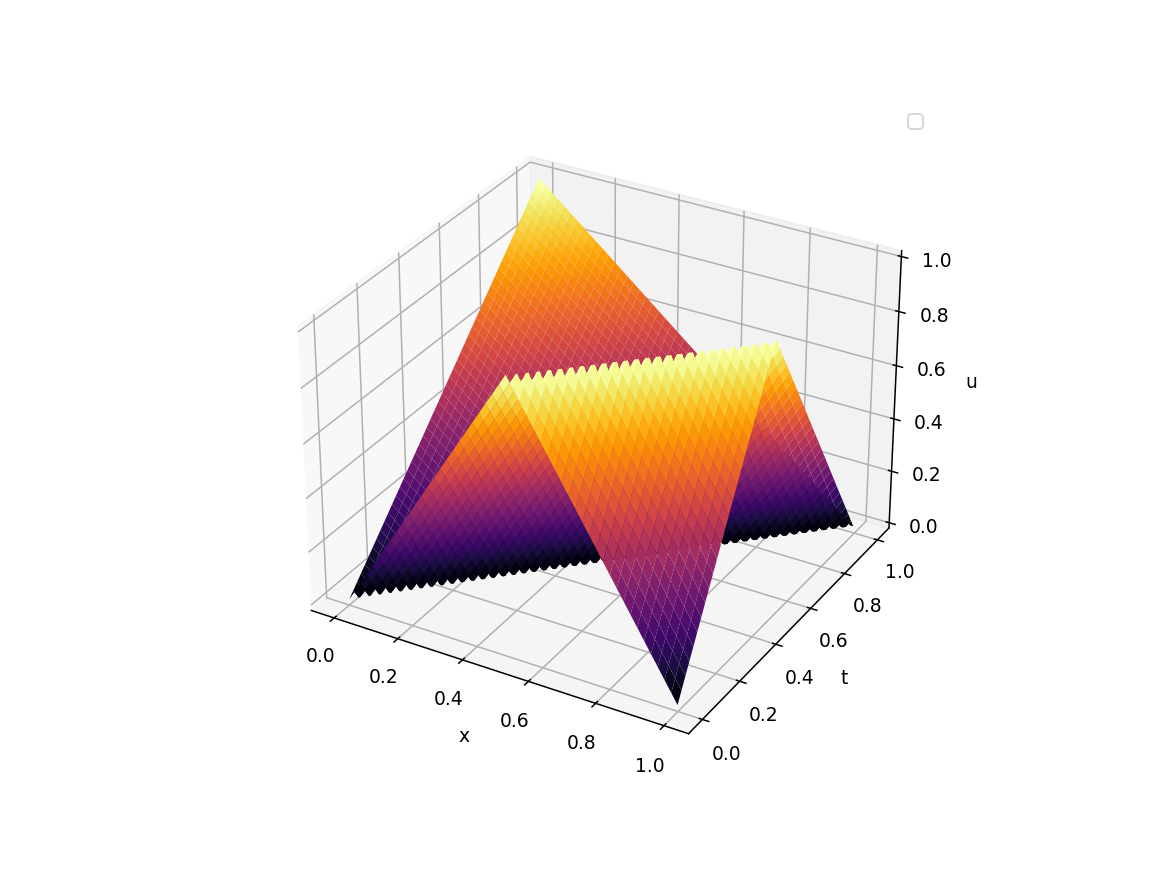

No handles with labels found to put in legend.


In [79]:
x_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)
t_ax = np.ones(Nx * Nt, dtype = float).reshape(Nt, Nx)

for i in range(Nt):
    for j in range(Nx):
        x_ax[i][j] = j * h
        t_ax[i][j] = i * t


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_ax, t_ax, data, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.legend()